# Functionやloopを使ったデータの可視化をする

## まずはデータのインポートから


In [3]:
!pip install plotly



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px



# CSVファイルからデータセットを読み込む
csv_file_path = 'emdat.csv'  # CSVファイルのパスに置き換えてください
emdat = pd.read_csv(csv_file_path)

# データセットの最初の数行を表示
emdat.head()

plt.rcParams['font.family'] = 'MS Gothic'       # Windowsならこれが確実
plt.rcParams['axes.unicode_minus'] = False 

### **チャレンジ 1: 国ごとの死亡者数を可視化**


In [20]:
def Death_country(country):
    df = emdat[emdat['Country'] == country]
    grouped = df.groupby('Disaster Type')['Total Deaths'].sum()

    grouped = grouped.sort_values(ascending=False)
    grouped = grouped[grouped > 0]

    plt.figure(figsize=(10,5))

    for i, (dtype, deaths) in enumerate(grouped.items()):
        plt.bar(dtype, deaths)
        plt.text(i, deaths, str(deaths), ha='center', va='bottom')

    plt.xticks(rotation=45)
    plt.title(f"{country} の災害タイプ別死亡者数")
    plt.xlabel("災害タイプ")
    plt.ylabel("死亡者数")
    plt.show()



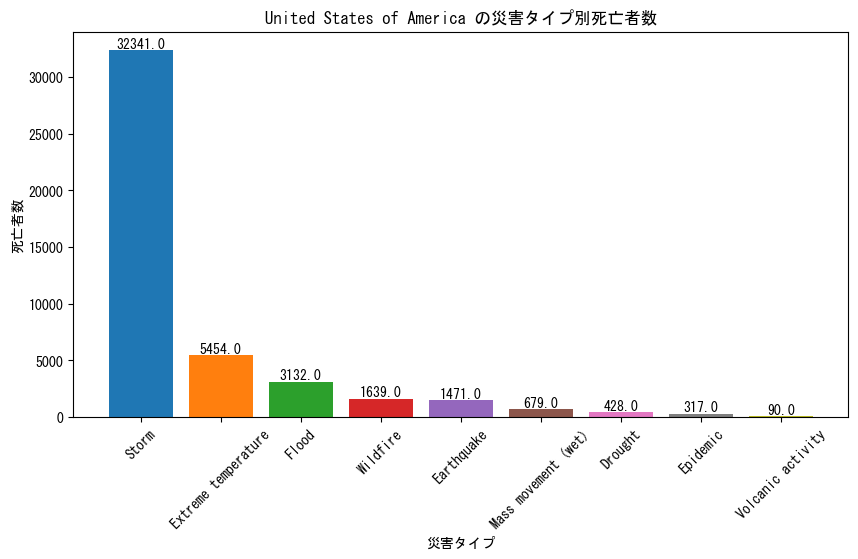

In [21]:
Death_country("United States of America")

国ごとの災害別死亡者集を可視化するために棒グラフを利用した。実行例としてアメリカを使用した。アメリカの災害についてわかることとしては圧倒的に竜巻での死亡者が突き抜けていると分かった。その次に天候、洪水と続いて被害の大きさを物語っている。

### **チャレンジ 2: 2つの国の死亡者数を比較**

In [16]:
def compare_countries(country1, country2):
    df = emdat[emdat['Country'].isin([country1, country2])]
    grouped = df.groupby(['Country', 'Disaster Type'])['Total Deaths'].sum().unstack()

    ax =grouped.T.plot(kind='bar', figsize=(12,6))

    for container in ax.containers:
        ax.bar_label(container)
        
    plt.title(f"{country1} と {country2} の災害タイプ別死亡者数 比較")
    plt.xlabel("災害タイプ")
    plt.ylabel("死亡者数")
    plt.xticks(rotation=45)
    plt.show()


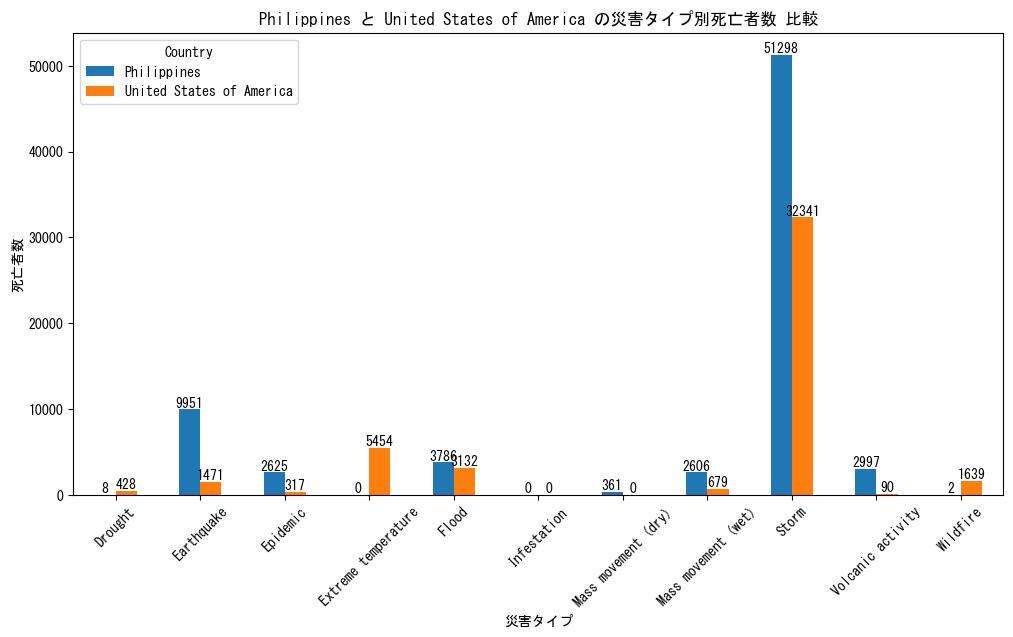

In [17]:
compare_countries("Philippines","United States of America")

2つの国の死亡者数を災害タイプごとに比較する。フィリピンとアメリカの比較を例として実行してみた。その結果２国とも竜巻での死亡者が多いがフィリピンの死亡者のほうが上回っていた。また、2つの国の違いとして地震での死亡者数の違いが次の大きな違いとしてあげられる。

### **チャレンジ 3: 最も致命的な災害トップNを可視化**

In [ ]:
def top_disasters(num):
    grouped = emdat.groupby('Disaster Type')['Total Deaths'].sum()
    topN = grouped.sort_values(ascending=False).head(num)

    plt.figure(figsize=(10,5))

    for i, (dtype, deaths) in enumerate(topN.items()):
        plt.bar(dtype, deaths)
        plt.text(i, deaths, str(deaths), ha='center', va='bottom')

    plt.xticks(rotation=45)
    plt.title(f"最も致命的な災害 Top {num}")
    plt.xlabel("災害タイプ")
    plt.ylabel("死亡者数")
    plt.show()



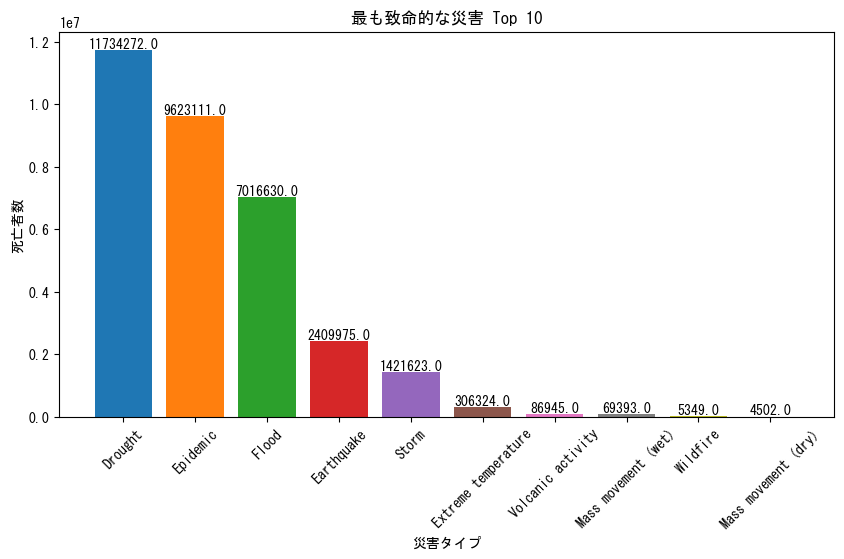

In [27]:
top_disasters(10)

世界中で起こっている災害について死亡者数が最も多いものとして干ばつ、感染症、洪水の順で死亡者数が多いと分かった。


### **チャレンジ 4: 特定の年範囲での死亡者数を可視化**

In [ ]:
def year_range(start_year, end_year):
    df = emdat[(emdat['Start Year'] >= start_year) & (emdat['Start Year'] <= end_year)]
    grouped = df.groupby('Disaster Type')['Total Deaths'].sum()

    grouped = grouped.sort_values(ascending=False)
    grouped = grouped[grouped > 0]

    plt.figure(figsize=(10,5))

    for i, (dtype, deaths) in enumerate(grouped.items()):
        plt.bar(dtype, deaths)
        plt.text(i, deaths, str(deaths), ha='center', va='bottom')

    plt.xticks(rotation=45)
    plt.title(f"{start_year}〜{end_year}年の災害別死亡者数")
    plt.xlabel("災害タイプ")
    plt.ylabel("死亡者数")
    plt.show()


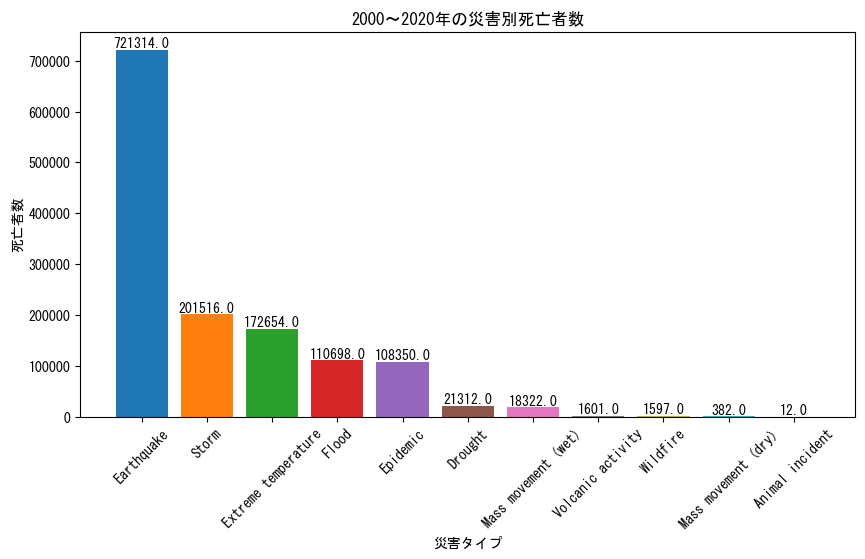

In [37]:
year_range(2000,2020)

指定した年において、どの災害が人命に最も大きな影響をもたらしたかを可視化したときに、2000年から2020年目までの災害死亡者を見たときに自信が突き抜けて多く、その次に竜巻などの災害があげられる。地震が最も多くなった理由として東日本大震災があったからだと考えられる。

### **チャレンジ 5: カスタム可視化を作成**
今まで起こった災害で1回の災害で死亡者が多かったものを好きな数を入れることで上位の災害名、発生年数、場所（国）、死亡者数をemdatデータから読み取り、グラフでの可視化を行った。

In [134]:
def top_death_disasters(n):
    topn = emdat.sort_values("Total Deaths", ascending=False).head(n)

    plt.figure(figsize=(12, 6))
    
    plt.bar(topn.index.astype(str), topn["Total Deaths"])
    
    for i, (idx, row) in enumerate(topn.iterrows()):
        plt.text(i, row["Total Deaths"], str(row["Total Deaths"]),
                 ha='center', va='bottom', fontsize=10)

    plt.title(f"史上、最多死亡者数 上位 {n} 件の災害（災害名・国名・死亡者数を含む）", fontsize=14)

    plt.xlabel("災害名（災害タイプ・国名・年）", fontsize=12)
    plt.ylabel("死亡者数", fontsize=12)

    x_labels = [
        f"{row['Disaster Type']} / {row['Country']} / {row['Start Year']}"
        for _, row in topn.iterrows()
    ]
    plt.xticks(range(len(topn)), x_labels, rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

    return topn  # データフレームも返す


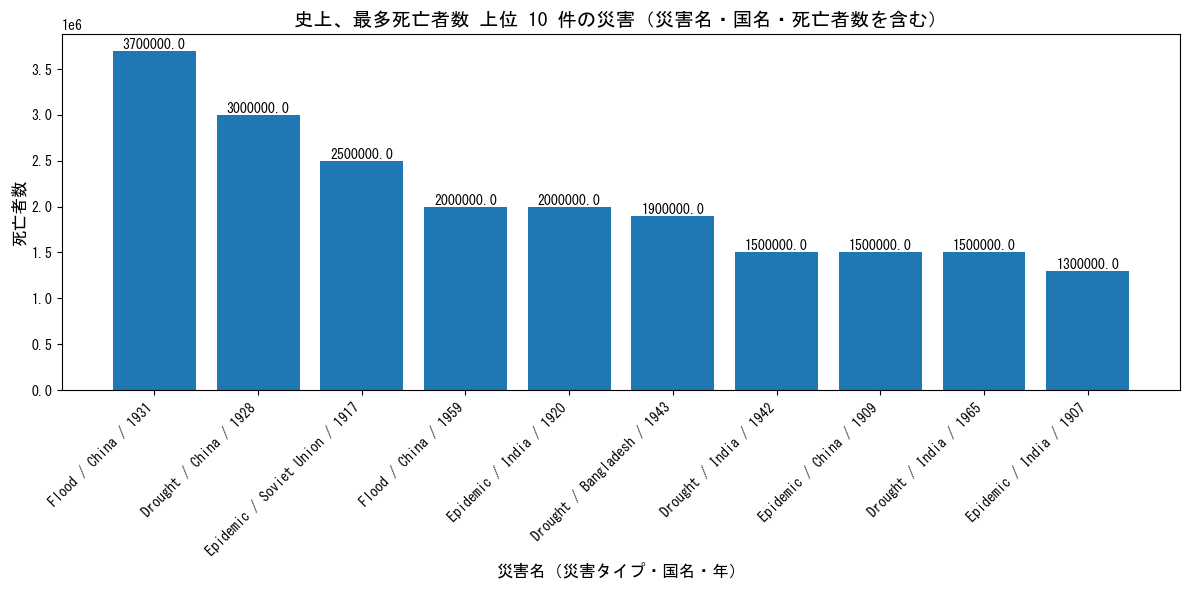

,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Latitude,Longitude,Start Year,Total Deaths
287,Hydrological,Flood,Riverine flood,CHN,China,Eastern Asia,Asia,NaN,NaN,1931,3700000.0
255,Climatological,Drought,Drought,CHN,China,Eastern Asia,Asia,NaN,NaN,1928,3000000.0
134,Biological,Epidemic,Infectious disease (General),SUN,Soviet Union,Eastern Europe,Europe,NaN,NaN,1917,2500000.0
847,Hydrological,Flood,Flood (General),CHN,China,Eastern Asia,Asia,NaN,NaN,1959,2000000.0
155,Biological,Epidemic,Bacterial disease,IND,India,Southern Asia,Asia,NaN,NaN,1920,2000000.0
457,Climatological,Drought,Drought,BGD,Bangladesh,Southern Asia,Asia,NaN,NaN,1943,1900000.0
441,Climatological,Drought,Drought,IND,India,Southern Asia,Asia,NaN,NaN,1942,1500000.0
60,Biological,Epidemic,Bacterial disease,CHN,China,Eastern Asia,Asia,NaN,NaN,1909,1500000.0
1147,Climatological,Drought,Drought,IND,India,Southern Asia,Asia,NaN,NaN,1965,1500000.0
54,Biological,Epidemic,Bacterial disease,IND,India,Southern Asia,Asia,NaN,NaN,1907,1300000.0


In [136]:
top_death_disasters(10)

これを可視化して分かったこととして、中国やインドで起こった災害が多数の死傷者を出しており、また昔に起こった災害が多いことから、昔は災害対策の設備がまだしっかりしていない状況に加えて、人口ランキングが一位と二位の国というのが示す通りで単純に人口が多いから被害を受ける人の数も大きくなっているのではと感じた。